In [70]:
import pandas as pd
import numpy as np
from datetime import datetime

# 시각화 라이브러리
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#color = sns.color_palette()
sns.set_palette("Paired")

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

##  데이터 확인

### Case.csv

* case_id : the ID of the infection case
* province : Special City / Metropolitan City / Province(-do)
* city : City(-si) / Country (-gun) / District (-gu)
* group : TRUE: group infection / FALSE: not group
* infection_case : the infection case (the name of group or other cases)
* confirmed	: the accumulated number of the confirmed
* latitude : the latitude of the group (WGS84)
* longitud : the longitude of the group (WGS84)

In [2]:
case = pd.read_csv("case.csv")
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [3]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         112 non-null    int64 
 1   province        112 non-null    object
 2   city            112 non-null    object
 3   group           112 non-null    bool  
 4   infection_case  112 non-null    object
 5   confirmed       112 non-null    int64 
 6   latitude        112 non-null    object
 7   longitude       112 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 6.4+ KB


In [169]:
case['infection_case'].value_counts().head()

overseas inflow             17
etc                         17
contact with patient        16
Shincheonji Church          15
Cheongdo Daenam Hospital     3
Name: infection_case, dtype: int64

### PatientInfo.csv

* patient_id : the ID of the patient
* global_num : the number given by KCDC 
* sex           
* birth_year    
* age           
* country : the country of the patient          
* province : the province of the patient        
* city   
* disease : TRUE: underlying disease / FALSE: no disease                       
* infection_case : the case of infection   
* infection_order : the order of infection 
* infected_by  : the ID of who infected the patient
* contact_number : the number of contacts with people
* symptom_onset_date : the date of symptom onset
* confirmed_date : the date of being confirmed
* released_date : the date of being released     
* deceased_date : the date of being deceased   
* state : isolated / released / deceased        

In [160]:
PInfo = pd.read_csv("PatientInfo.csv")
PInfo.tail()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [149]:
PInfo['infection_case'].value_counts()

contact with patient                     968
overseas inflow                          604
etc                                      572
Guro-gu Call Center                      112
Shincheonji Church                       107
Onchun Church                             33
Bonghwa Pureun Nursing Home               31
gym facility in Cheonan                   30
Ministry of Oceans and Fisheries          28
Cheongdo Daenam Hospital                  21
Dongan Church                             17
Eunpyeong St. Mary's Hospital             16
Gyeongsan Seorin Nursing Home             15
Seongdong-gu APT                          13
Gyeongsan Jeil Silver Town                12
Milal Shelter                             11
Gyeongsan Cham Joeun Community Center     10
Geochang Church                            6
Changnyeong Coin Karaoke                   4
gym facility in Sejong                     4
Suyeong-gu Kindergarten                    3
Pilgrimage to Israel                       2
River of G

In [5]:
PInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   sex                 3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

In [187]:
# 확진자 중 신천지가 원인인 사람들
shincheonji_case = PInfo.loc[PInfo['infection_case']=="Shincheonji Church"]
shincheonji_case

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
22,1000000023,188.0,male,1961.0,50s,Korea,Seoul,Seocho-gu,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,NaN,released
46,1000000047,1247.0,male,1993.0,20s,Korea,Seoul,Gangnam-gu,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-26,2020-03-11,NaN,released
230,1000000231,8055.0,female,1963.0,50s,Korea,Seoul,Seocho-gu,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-03-12,NaN,NaN,released
636,1100000004,NaN,female,1998.0,20s,Korea,Busan,Haeundae-gu,NaN,Shincheonji Church,NaN,NaN,8.0,NaN,2020-02-22,NaN,NaN,released
639,1100000007,NaN,male,1994.0,20s,China,Busan,NaN,NaN,Shincheonji Church,NaN,NaN,485.0,NaN,2020-02-22,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,6100000055,NaN,female,2000.0,20s,Korea,Gyeongsangnam-do,Miryang-si,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-28,NaN,NaN,released
3320,6100000062,NaN,female,1999.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-03-01,2020-03-18,NaN,released
3321,6100000063,NaN,female,2000.0,20s,Korea,Gyeongsangnam-do,Goseong-gun,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,released
3322,6100000064,NaN,female,1999.0,20s,Korea,Gyeongsangnam-do,Geochang-gun,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-03-02,2020-03-19,NaN,released


### PatientRoute.csv

* date : 2020-01-22 ~ 2020-03-25

In [201]:
PRoute = pd.read_csv("PatientRoute.csv")
PRoute.tail()

,patient_id,global_num,date,province,city,type,latitude,longitude
6709,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558654,126.794474
6710,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
6711,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
6712,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003
6713,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389


In [7]:
PRoute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  6714 non-null   int64  
 1   global_num  3571 non-null   float64
 2   date        6714 non-null   object 
 3   province    6714 non-null   object 
 4   city        6714 non-null   object 
 5   type        6714 non-null   object 
 6   latitude    6714 non-null   float64
 7   longitude   6714 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 419.8+ KB


In [198]:
PRoute['patient_id'].value_counts() # 1211명의 환자

1000000417    45
3009000014    42
1400000021    38
3009000013    37
6016000012    36
              ..
6100000067     1
6100000079     1
6100000045     1
6100000029     1
1100000017     1
Name: patient_id, Length: 1211, dtype: int64

### Time.csv

* date : YYYY-MM-DD  (2020-01-20~2020-04-30)
* time : Time (0 = AM 12:00 / 16 = PM 04:00)
* test : the accumulated number of tests
* negative : the accumulated number of negative results
* confirmed : the accumulated number of positive results
* released : the accumulated number of releases
* deceased : the accumulated number of deceases

In [202]:
time = pd.read_csv("Time.csv")
time.tail()

,date,time,test,negative,confirmed,released,deceased
97,2020-04-26,0,598285,578558,10728,8717,242
98,2020-04-27,0,601660,582027,10738,8764,243
99,2020-04-28,0,608514,588559,10752,8854,244
100,2020-04-29,0,614197,595129,10761,8922,246
101,2020-04-30,0,619881,600482,10765,9059,247


In [9]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       102 non-null    object
 1   time       102 non-null    int64 
 2   test       102 non-null    int64 
 3   negative   102 non-null    int64 
 4   confirmed  102 non-null    int64 
 5   released   102 non-null    int64 
 6   deceased   102 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.7+ KB


### TimeAge.csv

* data : 2020-03-02 ~ 2020-04-30
* 확진자 수 / 사망자 수 : 누적 합

In [203]:
timeage = pd.read_csv("TimeAge.csv")
timeage.tail(20)

,date,time,age,confirmed,deceased
520,2020-04-28,0,70s,709,73
521,2020-04-28,0,80s,485,116
522,2020-04-29,0,0s,140,0
523,2020-04-29,0,10s,590,0
524,2020-04-29,0,20s,2951,0
525,2020-04-29,0,30s,1156,2
526,2020-04-29,0,40s,1426,3
527,2020-04-29,0,50s,1956,15
528,2020-04-29,0,60s,1348,35
529,2020-04-29,0,70s,709,73


In [11]:
timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       540 non-null    object
 1   time       540 non-null    int64 
 2   age        540 non-null    object
 3   confirmed  540 non-null    int64 
 4   deceased   540 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.2+ KB


### TimeGender.csv

* date : 2020-03-02 ~ 2020-04-30
* 확진자 수 / 사망자 수 : 누적 합

In [204]:
timegender = pd.read_csv("TimeGender.csv")
timegender.tail(10)

,date,time,sex,confirmed,deceased
110,2020-04-26,0,male,4333,127
111,2020-04-26,0,female,6395,115
112,2020-04-27,0,male,4337,127
113,2020-04-27,0,female,6401,116
114,2020-04-28,0,male,4344,128
115,2020-04-28,0,female,6408,116
116,2020-04-29,0,male,4348,129
117,2020-04-29,0,female,6413,117
118,2020-04-30,0,male,4352,130
119,2020-04-30,0,female,6413,117


In [20]:
timegender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       120 non-null    object
 1   time       120 non-null    int64 
 2   sex        120 non-null    object
 3   confirmed  120 non-null    int64 
 4   deceased   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


### TimeProvince.csv

* date : 2020-01-20 ~ 2020-04-30
* 누적 합

In [206]:
timepro = pd.read_csv("TimeProvince.csv")
timepro.tail(30)

,date,time,province,confirmed,released,deceased
1704,2020-04-29,0,Gwangju,30,26,0
1705,2020-04-29,0,Daejeon,40,35,0
1706,2020-04-29,0,Ulsan,43,37,1
1707,2020-04-29,0,Sejong,46,36,0
1708,2020-04-29,0,Gyeonggi-do,676,481,15
1709,2020-04-29,0,Gangwon-do,53,37,2
1710,2020-04-29,0,Chungcheongbuk-do,45,40,0
1711,2020-04-29,0,Chungcheongnam-do,143,123,0
1712,2020-04-29,0,Jeollabuk-do,18,10,0
1713,2020-04-29,0,Jeollanam-do,15,10,0


In [30]:
timepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1734 non-null   object
 1   time       1734 non-null   int64 
 2   province   1734 non-null   object
 3   confirmed  1734 non-null   int64 
 4   released   1734 non-null   int64 
 5   deceased   1734 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 81.4+ KB


### Region.csv

* code : the code of the region
* province : Special City / Metropolitan City / Province(-do)
* city : City(-si) / Country (-gun) / District (-gu)
* latitude : the latitude of the visit (WGS84)
* longitude : the longitude of the visit (WGS84)
* elementary_school_count : the number of elementary schools
* elderly_alone_ratio : the ratio of elderly households living alone
* nursing_home_count : the number of nursing homes (요양원)

In [32]:
region = pd.read_csv("Region.csv")
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [33]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


### Weather.csv

In [34]:
weather = pd.read_csv("Weather.csv")
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [35]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25295 entries, 0 to 25294
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   25295 non-null  int64  
 1   province               25295 non-null  object 
 2   date                   25295 non-null  object 
 3   avg_temp               25280 non-null  float64
 4   min_temp               25290 non-null  float64
 5   max_temp               25292 non-null  float64
 6   precipitation          25295 non-null  float64
 7   max_wind_speed         25286 non-null  float64
 8   most_wind_direction    25266 non-null  float64
 9   avg_relative_humidity  25275 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.9+ MB


### Searchtrend.csv

* date : 2016-01-01 ~ 	2020-04-29
* cold : the search volume of cold in Korean language (감기)
* flu : the search volume of flu in Korean language (독감)
* pneumonia : the search volume of pneumonia in Korean language (폐렴)
* coronavirus : the search volume of coronavirus in Korean language (코로나바이러스)

In [207]:
searcht = pd.read_csv('Searchtrend.csv')
searcht.tail()

,date,cold,flu,pneumonia,coronavirus
1576,2020-04-25,0.12781,0.02709,0.08672,4.13405
1577,2020-04-26,0.13363,0.03263,0.08136,3.95342
1578,2020-04-27,0.11226,0.04427,0.10390,4.11033
1579,2020-04-28,0.11481,0.03981,0.10336,3.73088
1580,2020-04-29,0.10781,0.04163,0.09136,3.78952


In [37]:
searcht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1581 non-null   object 
 1   cold         1581 non-null   float64
 2   flu          1581 non-null   float64
 3   pneumonia    1581 non-null   float64
 4   coronavirus  1581 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.9+ KB


### SeoulFloating.csv

* date : 	2020-01-01 ~ 2020-02-29

In [208]:
seoulF = pd.read_csv("SeoulFloating.csv")
seoulF.tail()

,date,hour,birth_year,sex,province,city,fp_num
431995,2020-02-29,23,70,male,Seoul,Yangcheon-gu,12080
431996,2020-02-29,23,70,female,Seoul,Yeongdeungpo-gu,17750
431997,2020-02-29,23,70,male,Seoul,Yeongdeungpo-gu,13290
431998,2020-02-29,23,70,female,Seoul,Yongsan-gu,12590
431999,2020-02-29,23,70,male,Seoul,Yongsan-gu,8560


In [42]:
seoulF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432000 entries, 0 to 431999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        432000 non-null  object
 1   hour        432000 non-null  int64 
 2   birth_year  432000 non-null  int64 
 3   sex         432000 non-null  object
 4   province    432000 non-null  object
 5   city        432000 non-null  object
 6   fp_num      432000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 23.1+ MB


### Policy.csv

* policy_id : the ID of the policy
* country :the country that implemented the policy
* type : the type of the policy
* gov_policy :the policy of the government
* detail : the detail of the policy
* start_date : the start date of the policy
* end_date :the end date of the policy

In [49]:
policy = pd.read_csv("Policy.csv")
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [50]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   policy_id   48 non-null     int64 
 1   country     48 non-null     object
 2   type        48 non-null     object
 3   gov_policy  48 non-null     object
 4   detail      46 non-null     object
 5   start_date  48 non-null     object
 6   end_date    10 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


## 시각화

### 시간에 따른 확진자/사망자 수

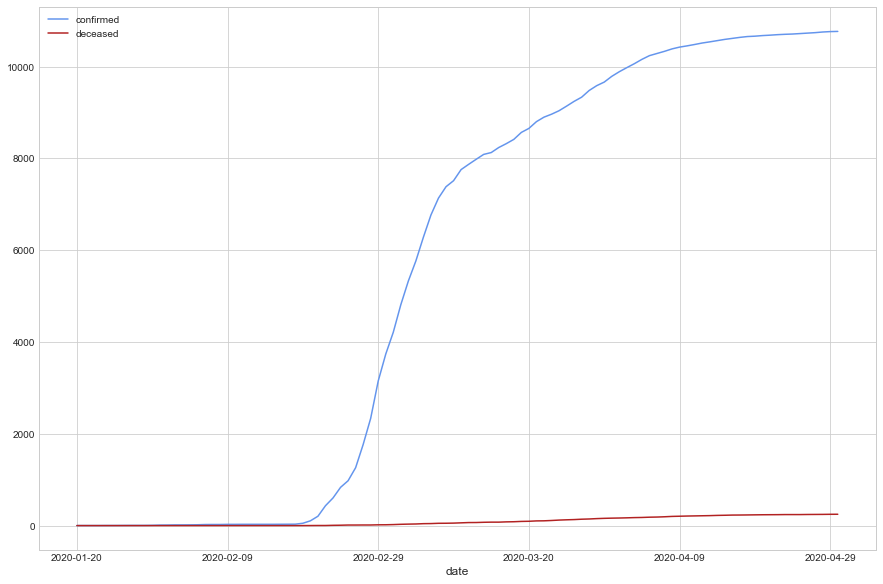

In [77]:
f,ax = plt.subplots(1,1,figsize=(15,10))
time.plot(x='date',y='confirmed',color='cornflowerblue', kind='line', ax=ax)
time.plot(x='date',y='deceased',color='firebrick', kind='line', ax=ax)

확진자는 2월 말에서 3월 초에 급증하였고, 사망자는 꾸준히 조금씩 늘어나고 있다.

### 지역별 확진자 분포

[Text(0, 0, 'Seoul'),
 Text(0, 0, 'Busan'),
 Text(0, 0, 'Daegu'),
 Text(0, 0, 'Incheon'),
 Text(0, 0, 'Gwangju'),
 Text(0, 0, 'Daejeon'),
 Text(0, 0, 'Ulsan'),
 Text(0, 0, 'Sejong'),
 Text(0, 0, 'Gyeonggi-do'),
 Text(0, 0, 'Gangwon-do'),
 Text(0, 0, 'Chungcheongbuk-do'),
 Text(0, 0, 'Chungcheongnam-do'),
 Text(0, 0, 'Jeollabuk-do'),
 Text(0, 0, 'Jeollanam-do'),
 Text(0, 0, 'Gyeongsangbuk-do'),
 Text(0, 0, 'Gyeongsangnam-do'),
 Text(0, 0, 'Jeju-do')]

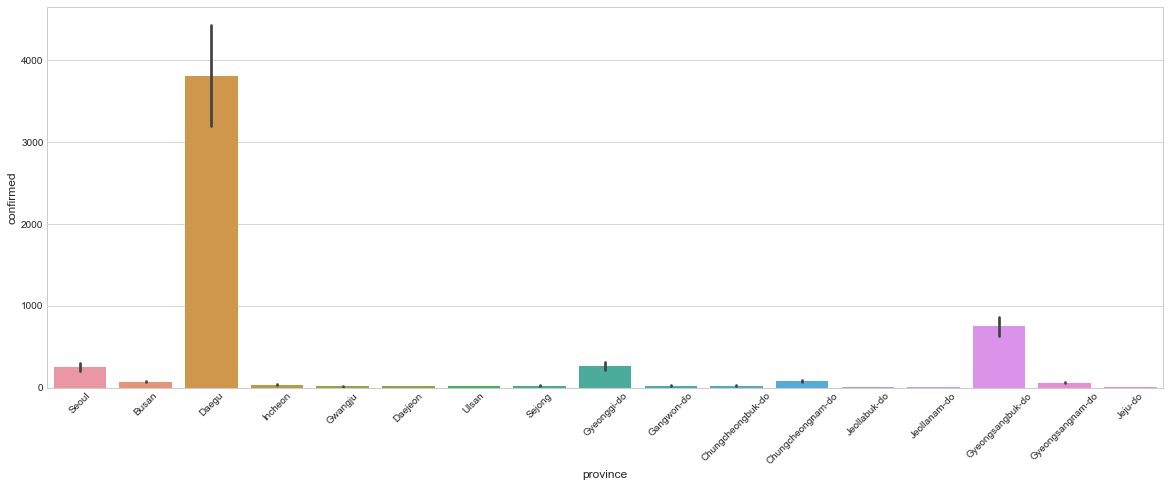

In [81]:
f, ax = plt.subplots(1, 1, figsize=(20, 7))

sns.barplot(x='province', y='confirmed', data=timepro)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

대구는 신천지때문에 가장 많은 확진자가 나온 것 같다. 아마 경상북도도 대구와 인접해있으니깐 많은게 아닐까? 그 이외엔 수도권인 서울, 경기도가 많다.

#### 대구

##### 시간별 대구 확진자

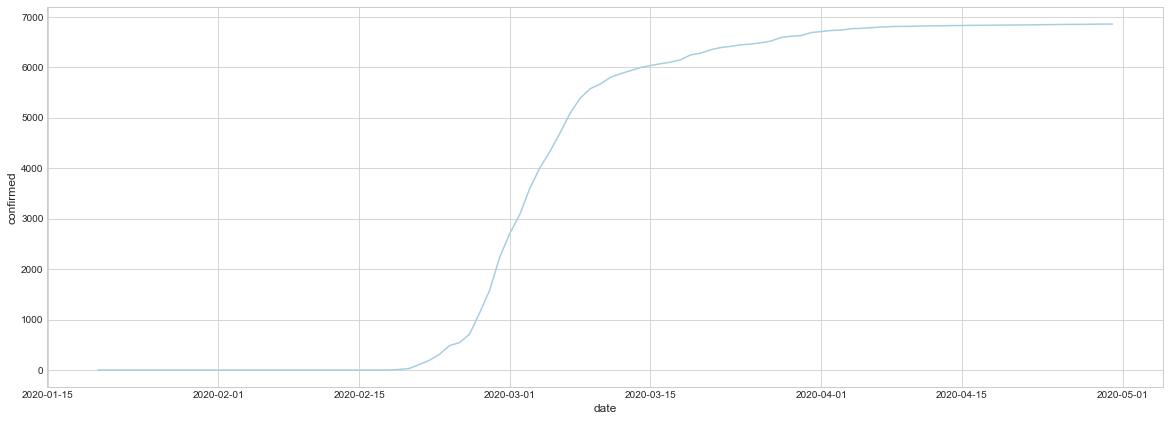

In [86]:
timepro['date'] = pd.to_datetime(timepro['date'])
timepro['date'] = timepro['date'].dt.date

f, ax = plt.subplots(1, 1, figsize=(20, 7))
daegu = timepro.loc[timepro['province'] == 'Daegu']
sns.lineplot(x='date', y='confirmed', data=daegu)

앞에서 확진자가 급증하던 시기와 비슷하다. 대구 신천지의 영향

##### 대구의 집단감염 case

In [90]:
daegu_infection_case = case.loc[case['province']=="Daegu"]
daegu_infection_case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510,35.84008,128.5667
21,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196,35.857375,128.466651
22,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,128,35.885592,128.556649
23,1200004,Daegu,Dalseong-gun,True,Daesil Convalescent Hospital,100,35.857393,128.466653
24,1200005,Daegu,Dong-gu,True,Fatima Hospital,37,35.88395,128.624059
25,1200006,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-
26,1200007,Daegu,-,False,overseas inflow,24,-,-
27,1200008,Daegu,-,False,contact with patient,929,-,-
28,1200009,Daegu,-,False,etc,724,-,-


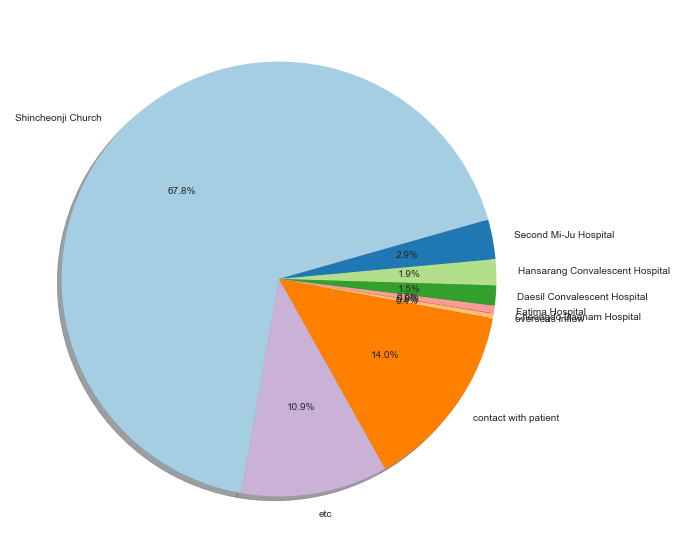

In [100]:
f, ax = plt.subplots(1, 1, figsize=(10,10))
ratio = daegu_infection_case['confirmed']
labels= daegu_infection_case['infection_case']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False,shadow=True)
plt.show()

* 대구는 신천지 관련 집단감염이 제일 많다.

In [89]:
case['infection_case'].value_counts().head(6)

overseas inflow             17
etc                         17
contact with patient        16
Shincheonji Church          15
Cheongdo Daenam Hospital     3
Guro-gu Call Center          3
Name: infection_case, dtype: int64

#### 경상북도

##### 시간별 경상북도 확진자

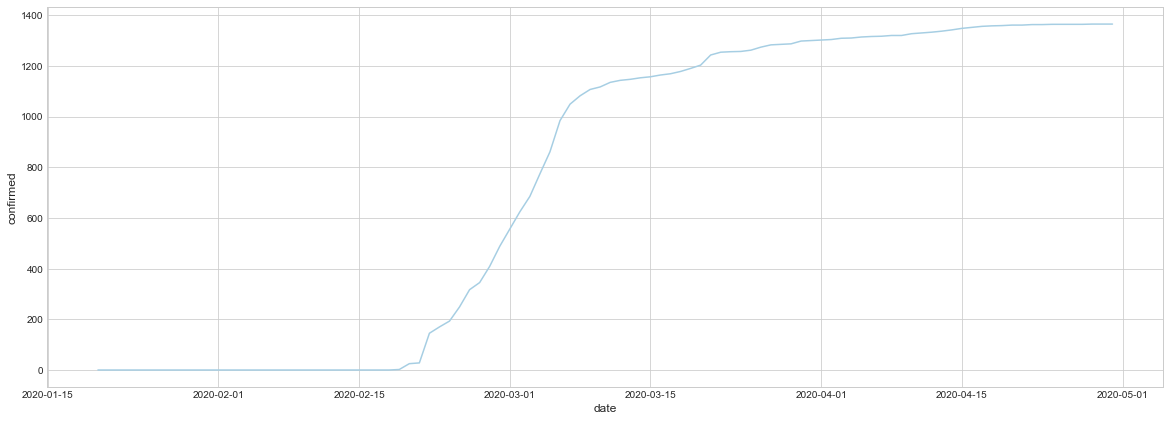

In [101]:
f, ax = plt.subplots(1, 1, figsize=(20, 7))
Gyeongsangbukdo = timepro.loc[timepro['province'] == 'Gyeongsangbuk-do']
sns.lineplot(x='date', y='confirmed', data=Gyeongsangbukdo)

* 대구와 비슷한 그래프 모양을 띈다. 이 역시 신천지의 영향인 것 같다.

#### 서울

##### 시간별 서울 확진자

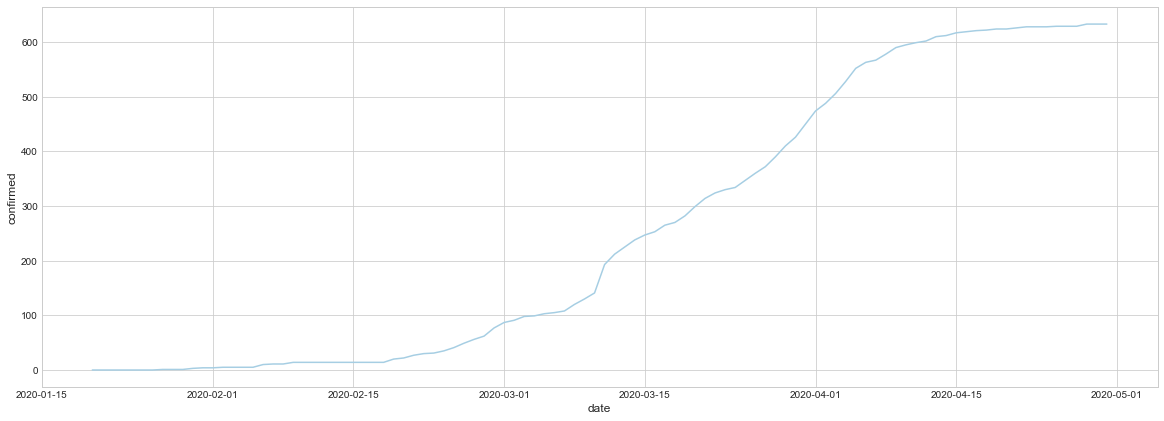

In [103]:
f, ax = plt.subplots(1, 1, figsize=(20, 7))
seoul = timepro.loc[timepro['province'] == 'Seoul']
sns.lineplot(x='date', y='confirmed', data=seoul)

3월달부터 쭉쭉 올라간다... 대구 그래프와 좀 다르다. 대구와 경상북도가 먼저 터지고 그 후에 서울에 퍼져서 그런것인가?

### 확진자/사망자 연령대 분포는 어떻게 될까?


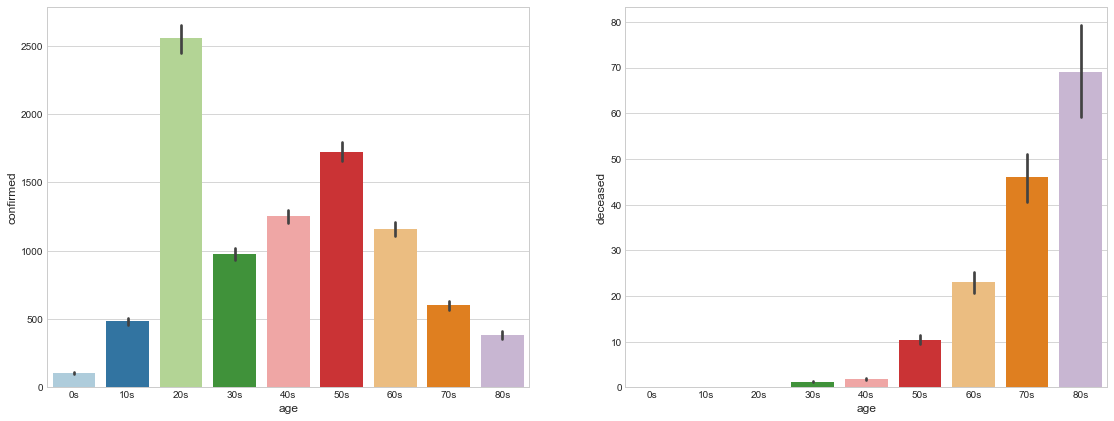

In [69]:
f, ax = plt.subplots(1, 2, figsize=(19, 7))

sns.barplot(x='age', y='confirmed', data=timeage,ax=ax[0])
sns.barplot(x='age', y='deceased', data=timeage,ax=ax[1])

확진자는 20대가 제일 많고 그다음으로 50대가 많다. 그에 비해 사망자는 80대, 70대가 많다. => 왜 20대가 많은지 확인해보기!

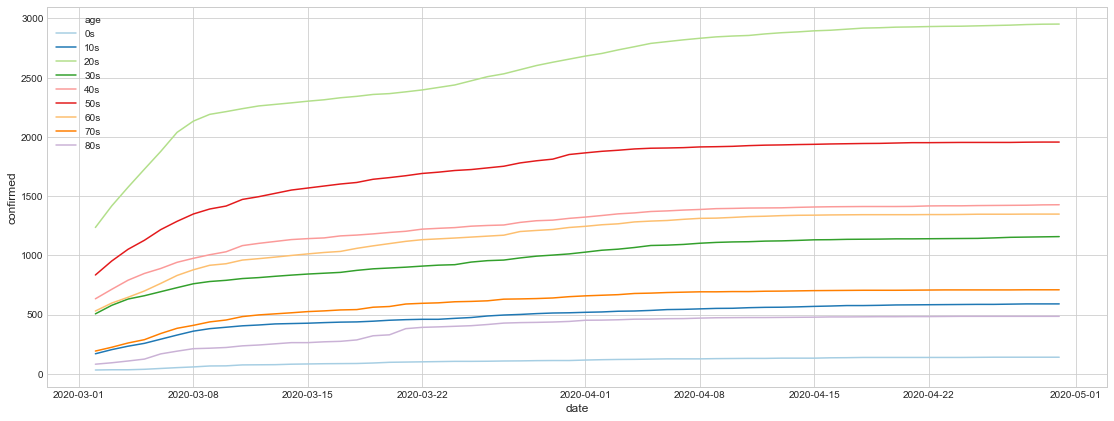

In [225]:
# 시간별 연령대별 확진자
timeage['date'] = pd.to_datetime(timeage['date'])
timeage['date'] = timeage['date'].dt.date

f, ax = plt.subplots(1, 1, figsize=(19, 7))
sns.lineplot(x='date', y='confirmed',hue='age', data=timeage)

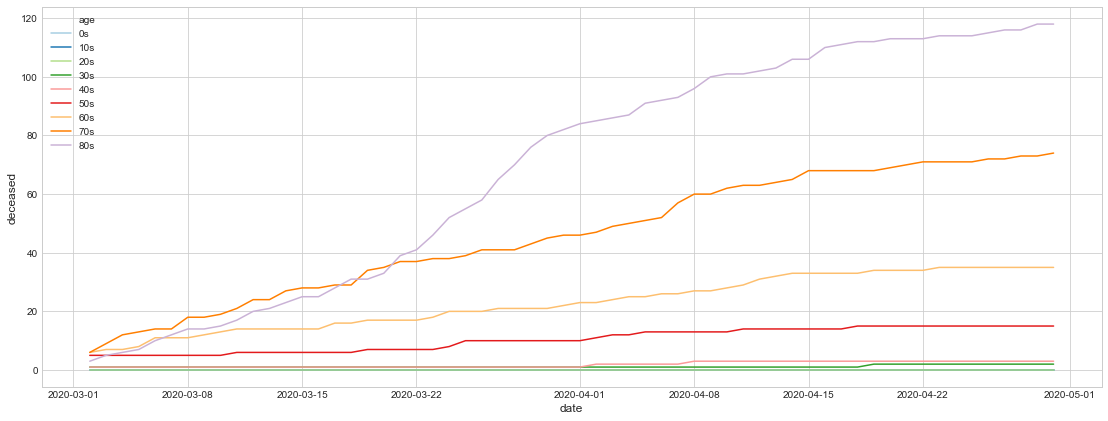

In [226]:
# 시간별 연령대별 사망자
f, ax = plt.subplots(1, 1, figsize=(19, 7))
sns.lineplot(x='date', y='deceased',hue='age', data=timeage)

* 3월 말부터 사망자가 증가하기 시작

### 확진자 성비

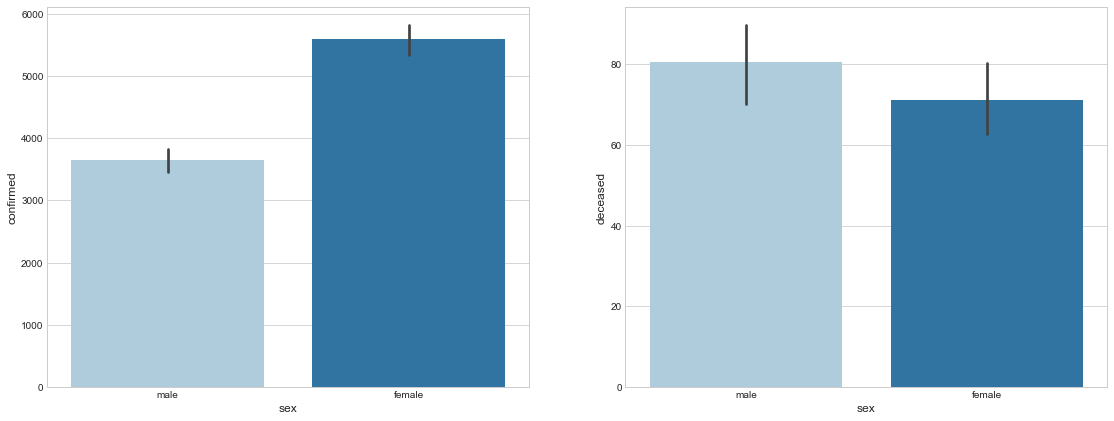

In [78]:
f, ax = plt.subplots(1, 2, figsize=(19, 7))

sns.barplot(x='sex', y='confirmed', data=timegender,ax=ax[0])
sns.barplot(x='sex', y='deceased', data=timegender,ax=ax[1])

* 확진자는 남성보다 여성이 더 많다.
* 사망자는 남성이 더 많다.

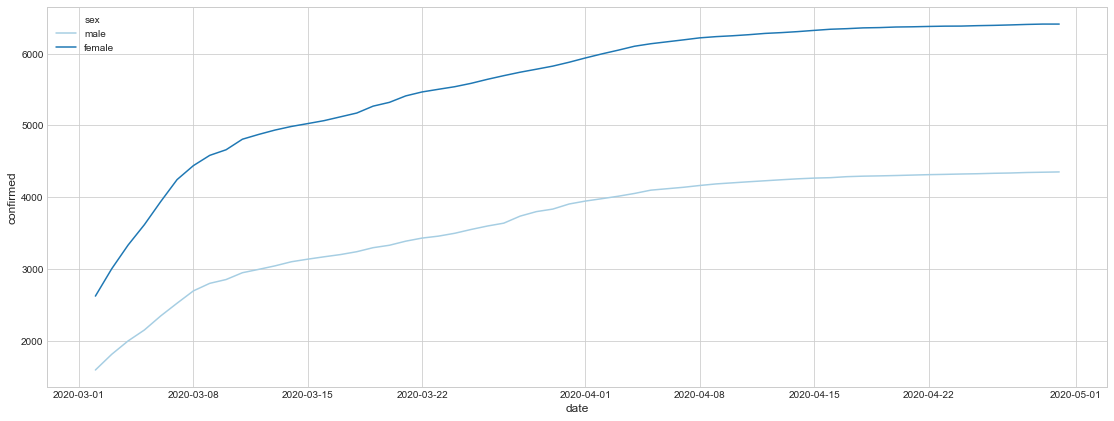

In [227]:
# 시간별 확진자 (성별)
timegender['date'] = pd.to_datetime(timegender['date'])
timegender['date'] = timegender['date'].dt.date

f, ax = plt.subplots(1, 1, figsize=(19, 7))
sns.lineplot(x='date', y='confirmed',hue='sex', data=timegender)

###  지역별 집단감염 분포 -> 미완성... 사실상 무쓸모.. 멋내기용 지도..

#### 서울

In [104]:
pip install folium

In [105]:
import folium

In [147]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [145]:
case.loc[case['latitude'].str.contains('-')].head(50)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
7,1000008,Seoul,from other city,True,Shincheonji Church,8,-,-
8,1000009,Seoul,-,False,overseas inflow,321,-,-
9,1000010,Seoul,-,False,contact with patient,18,-,-
10,1000011,Seoul,-,False,etc,24,-,-
12,1100002,Busan,from other city,True,Shincheonji Church,12,-,-
16,1100006,Busan,from other city,True,Cheongdo Daenam Hospital,1,-,-
17,1100007,Busan,-,False,overseas inflow,25,-,-
18,1100008,Busan,-,False,contact with patient,18,-,-
19,1100009,Busan,-,False,etc,29,-,-
25,1200006,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-


* 집단감염인데 from other city이거나 집단감염이 아닌 경우 경도,위도가 존재하지 않는다

In [115]:
seoul_case = case.loc[case['province']=='Seoul']
seoul_case.loc[seoul_case['latitude'].str.contains('-')]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
7,1000008,Seoul,from other city,True,Shincheonji Church,8,-,-
8,1000009,Seoul,-,False,overseas inflow,321,-,-
9,1000010,Seoul,-,False,contact with patient,18,-,-
10,1000011,Seoul,-,False,etc,24,-,-


In [116]:
case1 =seoul_case.copy()
case1_d= case1.loc[case1['latitude'].str.contains('-')]
case1.drop(case1_d.index,axis=0,inplace=True)
case1.loc[case1['latitude'].str.contains('-')]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude


In [117]:
case1

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
5,1000006,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
6,1000007,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377


In [131]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

case1['latitude']= case1['latitude'].astype('float')
case1['longitude']= case1['longitude'].astype('float')


map1 = folium.Map(location=[37.541, 126.986], 
                       # tiles = 'stamentoner',# width=1000, height=500,
                        zoom_start = 11)

list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map1)
for a in case1.index:
    folium.Marker(location = [case1.loc[a,"latitude"],case1.loc[a,"longitude"]],
                  zoom_start=12,
                  popup=case1.loc[a,"confirmed"]).add_to(marker_cluster)
    list1.append(case1.loc[a,"latitude"])
    list2.append(case1.loc[a,"longitude"])

map1

#### 전지역

In [132]:
case2 = case.copy()
case2_d= case2.loc[case2['latitude'].str.contains('-')]
case2.drop(case2_d.index,axis=0,inplace=True)
case2.loc[case2['latitude'].str.contains('-')]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude


In [138]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

case2['latitude']= case2['latitude'].astype('float')
case2['longitude']= case2['longitude'].astype('float')


map2 = folium.Map(location=[37.541, 126.986], 
                       # tiles = 'stamentoner',# width=1000, height=500,
                        zoom_start =7)

list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map2)
for a in case2.index:
    folium.Marker(location = [case2.loc[a,"latitude"],case2.loc[a,"longitude"]],
                  zoom_start=12,
                  popup=case2.loc[a,"confirmed"]).add_to(marker_cluster)
    list1.append(case2.loc[a,"latitude"])
    list2.append(case2.loc[a,"longitude"])

map2

### ect 데이터 
*  infection_case에서 높은 비율을 차지하는 etc은 뭘까? 어떻게 찾지..

In [170]:
case.loc[case['infection_case']=="etc"]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
10,1000011,Seoul,-,False,etc,24,-,-
19,1100009,Busan,-,False,etc,29,-,-
28,1200009,Daegu,-,False,etc,724,-,-
32,1300004,Gwangju,-,False,etc,0,-,-
37,1400005,Incheon,-,False,etc,4,-,-
43,1500006,Daejeon,-,False,etc,9,-,-
47,1600004,Ulsan,-,False,etc,7,-,-
53,1700006,Sejong,-,False,etc,1,-,-
62,2000009,Gyeonggi-do,-,False,etc,43,-,-
68,3000006,Gangwon-do,-,False,etc,7,-,-


In [185]:
PInfo.loc[(PInfo['infection_case']=="etc") & (PInfo['province'] == "Gyeongsangbuk-do") ]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2377,6001000349,5942.0,female,1943.0,70s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,etc,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
2378,6001000350,5963.0,female,1933.0,80s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,etc,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
2379,6001000351,6000.0,female,1935.0,80s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,etc,NaN,NaN,NaN,NaN,2020-03-05,2020-04-08,NaN,released
2380,6001000352,6155.0,female,1932.0,80s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,etc,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
2384,6001000356,5965.0,male,1935.0,80s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,etc,NaN,NaN,NaN,NaN,2020-03-05,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,6016000003,NaN,male,1996.0,20s,Korea,Gyeongsangbuk-do,Yecheon-gun,NaN,etc,NaN,NaN,NaN,NaN,2020-03-01,2020-03-10,NaN,released
3031,6016000004,NaN,female,1966.0,50s,Korea,Gyeongsangbuk-do,Yecheon-gun,NaN,etc,NaN,NaN,NaN,NaN,2020-03-04,2020-04-04,NaN,released
3032,6016000005,NaN,male,1966.0,50s,Korea,Gyeongsangbuk-do,Yecheon-gun,NaN,etc,NaN,NaN,NaN,NaN,2020-03-04,2020-03-24,NaN,released
3033,6016000006,NaN,male,1959.0,60s,Korea,Gyeongsangbuk-do,Yecheon-gun,NaN,etc,NaN,NaN,NaN,NaN,2020-03-06,2020-03-22,NaN,released


### 집단감염 => 미완

In [148]:
group_true = case.loc[case['group'] == True]
group_true

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
...,...,...,...,...,...,...,...,...
101,6100003,Gyeongsangnam-do,Geochang-gun,True,Geochang-gun Woongyang-myeon,8,35.805681,127.917805
102,6100004,Gyeongsangnam-do,Jinju-si,True,Wings Tower,10,35.164845,128.126969
103,6100005,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866
104,6100006,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008


### 왜 20대 확진자가 많을까? => 유동인구, 루트.. 등 확인

### 검색트렌드

In [210]:
searcht.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


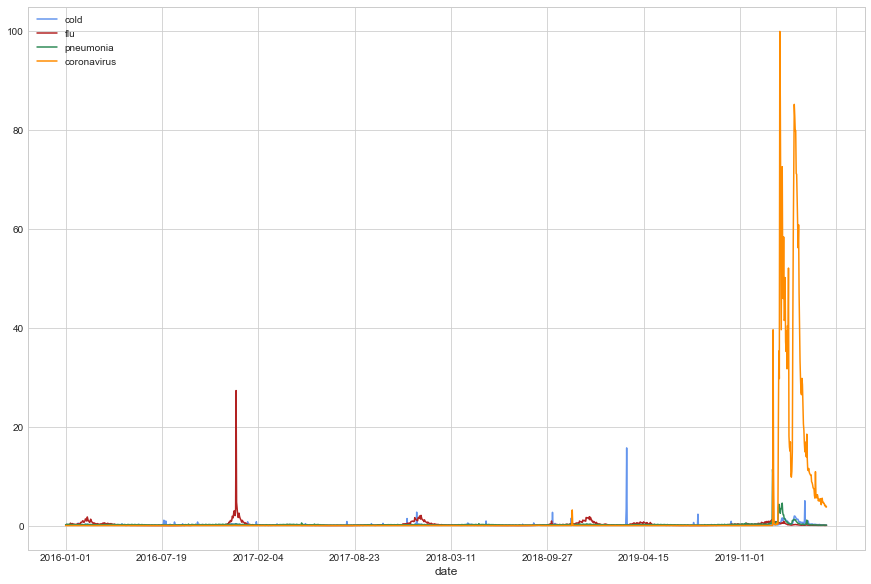

In [211]:
f,ax = plt.subplots(1,1,figsize=(15,10))
searcht.plot(x='date',y='cold',color='cornflowerblue', kind='line', ax=ax)
searcht.plot(x='date',y='flu',color='firebrick', kind='line', ax=ax)
searcht.plot(x='date',y='pneumonia',color='seagreen', kind='line', ax=ax)
searcht.plot(x='date',y='coronavirus',color='darkorange', kind='line', ax=ax)

* 코로나 터지기 한참 전은 의미가 없을 것 같다..2019-12-15부터 그래프를 그려보자

In [222]:
searcht['date']=searcht['date'].astype('str')

corona_date = searcht.loc[(searcht['date'] >= '2019-12-15') & (searcht['date'] <= '2020-04-29')]
corona_date

,date,cold,flu,pneumonia,coronavirus
1444,2019-12-15,0.12445,0.35189,0.20381,0.01163
1445,2019-12-16,0.16417,0.66434,0.33217,0.01536
1446,2019-12-17,0.16172,0.59634,0.30362,0.02245
1447,2019-12-18,0.15063,0.56607,0.29180,0.01999
1448,2019-12-19,0.16935,0.56161,0.28608,0.01890
...,...,...,...,...,...
1576,2020-04-25,0.12781,0.02709,0.08672,4.13405
1577,2020-04-26,0.13363,0.03263,0.08136,3.95342
1578,2020-04-27,0.11226,0.04427,0.10390,4.11033
1579,2020-04-28,0.11481,0.03981,0.10336,3.73088


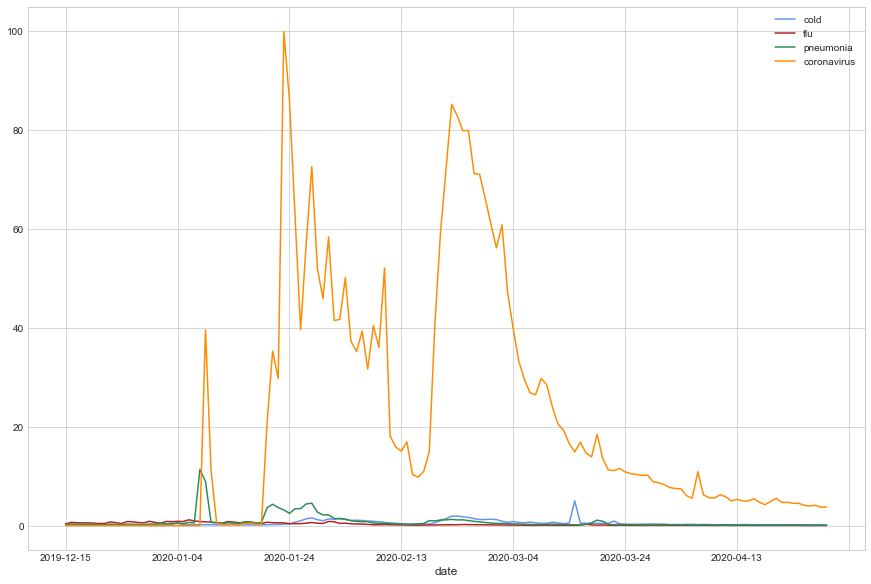

In [223]:
f,ax = plt.subplots(1,1,figsize=(15,10))
corona_date.plot(x='date',y='cold',color='cornflowerblue', kind='line', ax=ax)
corona_date.plot(x='date',y='flu',color='firebrick', kind='line', ax=ax)
corona_date.plot(x='date',y='pneumonia',color='seagreen', kind='line', ax=ax)
corona_date.plot(x='date',y='coronavirus',color='darkorange', kind='line', ax=ax)

* https://ko.wikipedia.org/wiki/%EC%BD%94%EB%A1%9C%EB%82%9819_%EB%B2%94%EC%9C%A0%ED%96%89 1월 초에 코로나바이러스라고 우한에서 밝혀져서 코로나 바이러스 검색어 비율이 확 증가한 것 같다.
* [서울 코로나 범유행](https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EC%9D%98_%EC%BD%94%EB%A1%9C%EB%82%9819_%EB%B2%94%EC%9C%A0%ED%96%89) 1월 24일 서울특별시 첫 확진자, 20일 국내 첫번째 확진자 발생 => 두번째로 코로나바이러스 검색어 비율 급증
* 2월~3월 => 신천지로 인해 1차 유행 시작

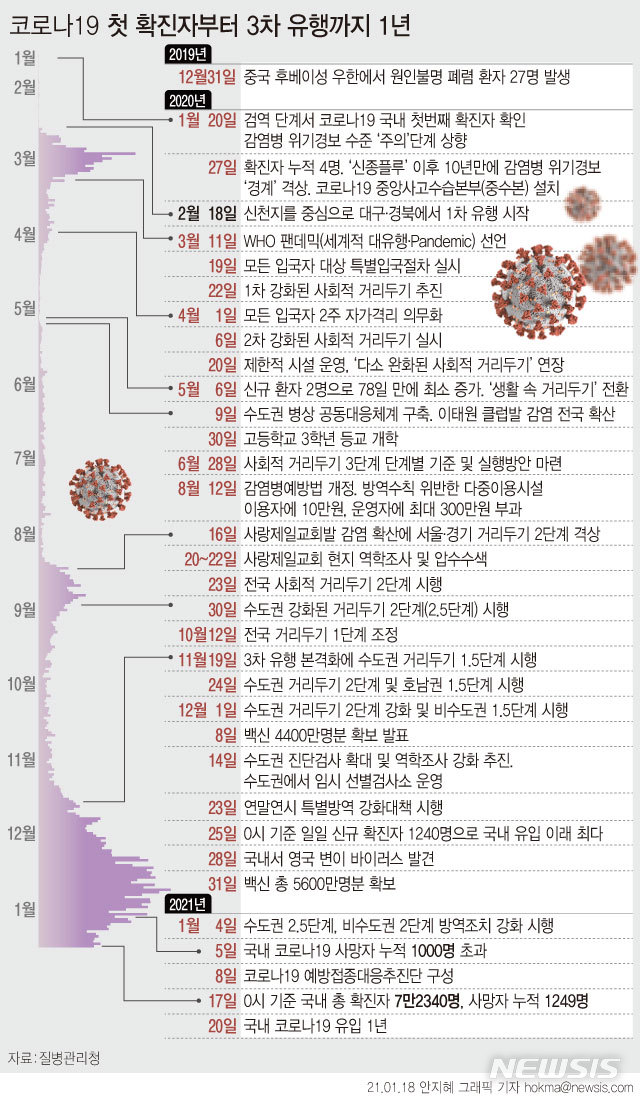   [사진출처](https://newsis.com/view/?id=NISX20210115_0001307379)